In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as kpss
import warnings
warnings.filterwarnings("ignore")

In [2]:
arr1 =  np.random.normal(0,1,100)
arr2 =  np.random.normal(0,10,100) + np.arange(0, 100, 1)

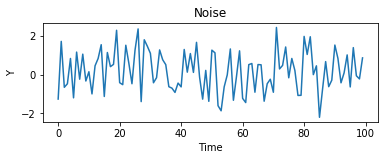

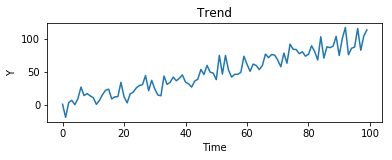

In [3]:
t = np.arange(0, 100, 1)
plt.subplot(2,1,1)
plt.plot(t, arr1)
plt.title('Noise')
plt.ylabel('Y')
plt.xlabel('Time')
plt.show()

plt.subplot(2,1,2)
plt.plot(t, arr2)
plt.title('Trend')
plt.ylabel('Y')
plt.xlabel('Time')
plt.show()

In [4]:
print(sm.tsa.stattools.kpss(arr1, regression='c')[0:2])
print(sm.tsa.stattools.kpss(arr2, regression='c')[0:2])

(0.12548884949442785, 0.1)
(0.8880449759536644, 0.01)


In [5]:
df = pd.read_csv('spending_by_day.csv')
#df['data'] = df.data.apply(lambda x: x[0:10].encode().decode('utf-8'))
df['data'] = df.data.apply(lambda x: x[0:10])
df['data'] = pd.to_datetime(df.data, errors='coerce')
df.set_index('data', inplace=True)
df.head()

,sum
data,
2018-01-01,1.897892e+06
2018-01-02,5.438664e+06
2018-01-03,5.628547e+06
2018-01-04,6.056366e+06
2018-01-05,6.064084e+06


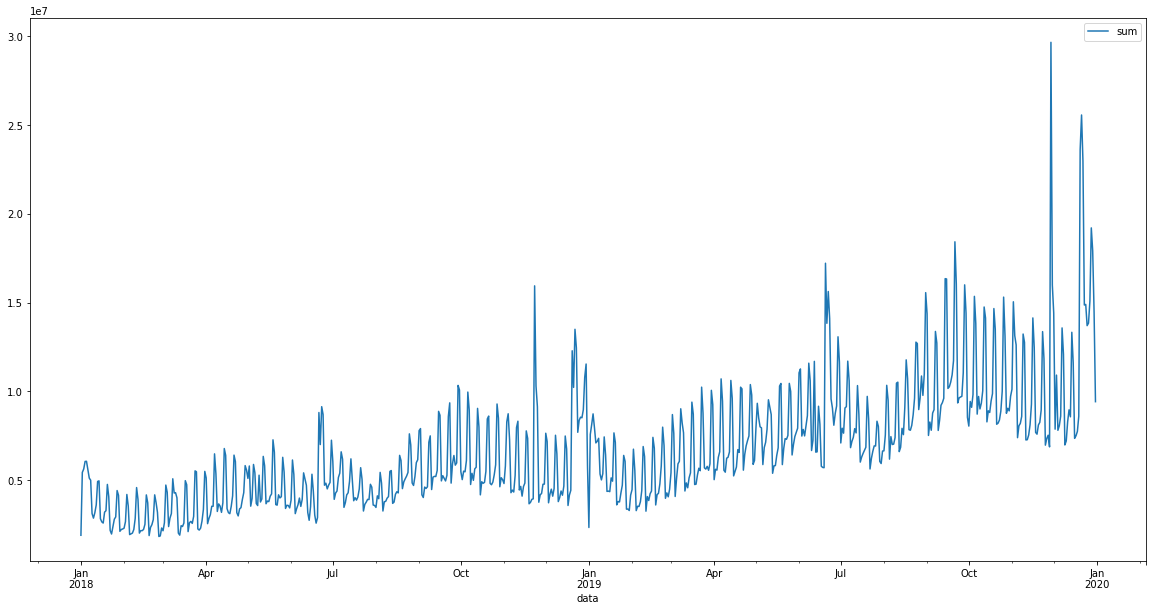

In [6]:
df.plot(figsize=(20,10));

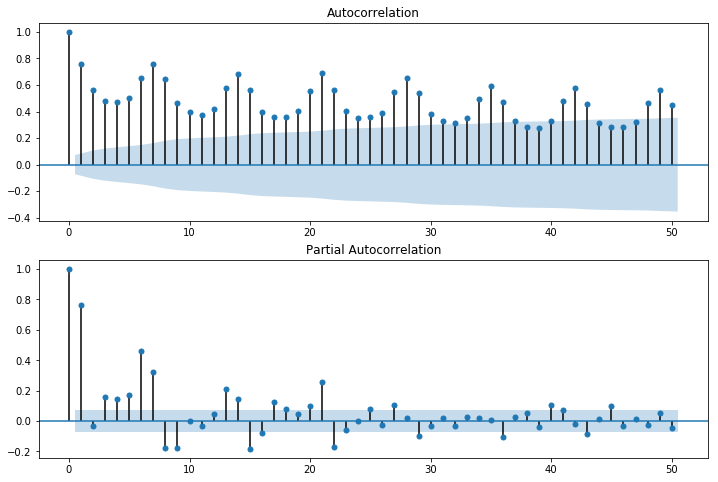

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=50, ax=ax2)

In [8]:
src_data_model = df[:'2019-11-01']
src_data_model
model = sm.tsa.ARIMA(src_data_model, order=(6,2,1)).fit(full_output=True, disp=0)

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.sum   No. Observations:                  668
Model:                 ARIMA(6, 2, 1)   Log Likelihood              -10378.611
Method:                       css-mle   S.D. of innovations        1339763.760
Date:                Sat, 15 May 2021   AIC                          20775.223
Time:                        19:43:36   BIC                          20815.761
Sample:                    01-03-2018   HQIC                         20790.927
                         - 11-01-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.5028     59.373      0.648      0.517     -77.865     154.871
ar.L1.D2.sum    -0.5376      0.034    -15.694      0.000      -0.605      -0.470
ar.L2.D2.sum    -0.7016      0.031    -22.945      0.000      -0.761      -0.642
ar.L3.D2.sum    -0.5990      0.034    -17.688      0.000      -0.665      -0.533
ar.L4.D2.sum    -0.5972      0.034    -17.703      0.000      -0.663      -0.531
ar.L5.D2.sum    -0.6661      0.031    -21.805      0.000      -0.726      -0.606
ar.L6.D2.sum    -0.4727      0.034    -13.805      0.000      -0.540      -0.406
ma.L1.D2.sum    -0.9999      0.004   -249.733      0.000      -1.008      -0.992
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6700           -0.7956j            1.0402           -0.1386
AR.2            0.6700           +0.7956j            1.0402            0.1386
AR.3           -0.2243           -1.0670j            1.0903           -0.2830
AR.4           -0.2243           +1.0670j            1.0903            0.2830
AR.5           -1.1502           -0.5671j            1.2824           -0.4271
AR.6           -1.1502           +0.5671j            1.2824            0.4271
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
pred = model.predict('2019-11-01','2020-02-01', typ='levels')

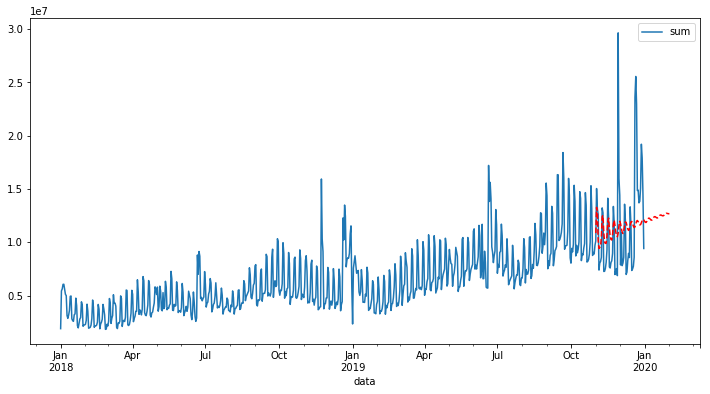

In [11]:
df.plot(figsize=(12,6))
pred.plot(style='r--');

# Домашнее задание

Проведите изначальную предобработку

In [12]:
#Проверим ряд на стационарность
print(sm.tsa.stattools.kpss(df['sum'], regression='c')[0:2])

(3.0200640143249817, 0.01)


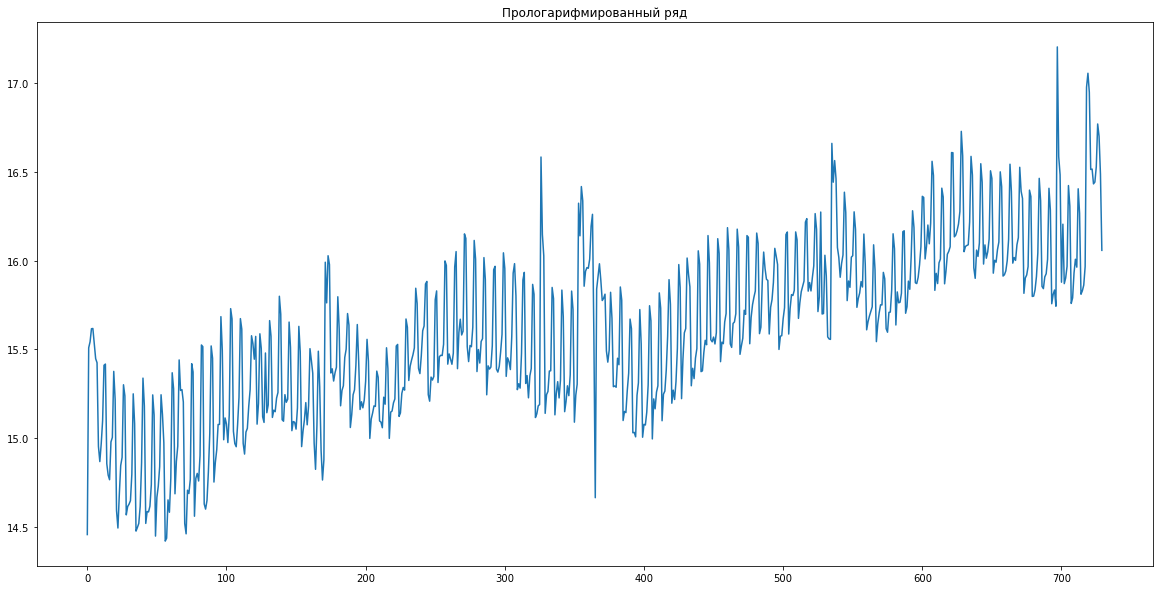

In [13]:
#Логарифмируем ряд и посмотрим на
plt.figure(figsize=(20,10))
plt.plot(np.log(df.values.squeeze()))
plt.title('Прологарифмированный ряд'); #получилось сгладить ряд, но он все еще не стационарный

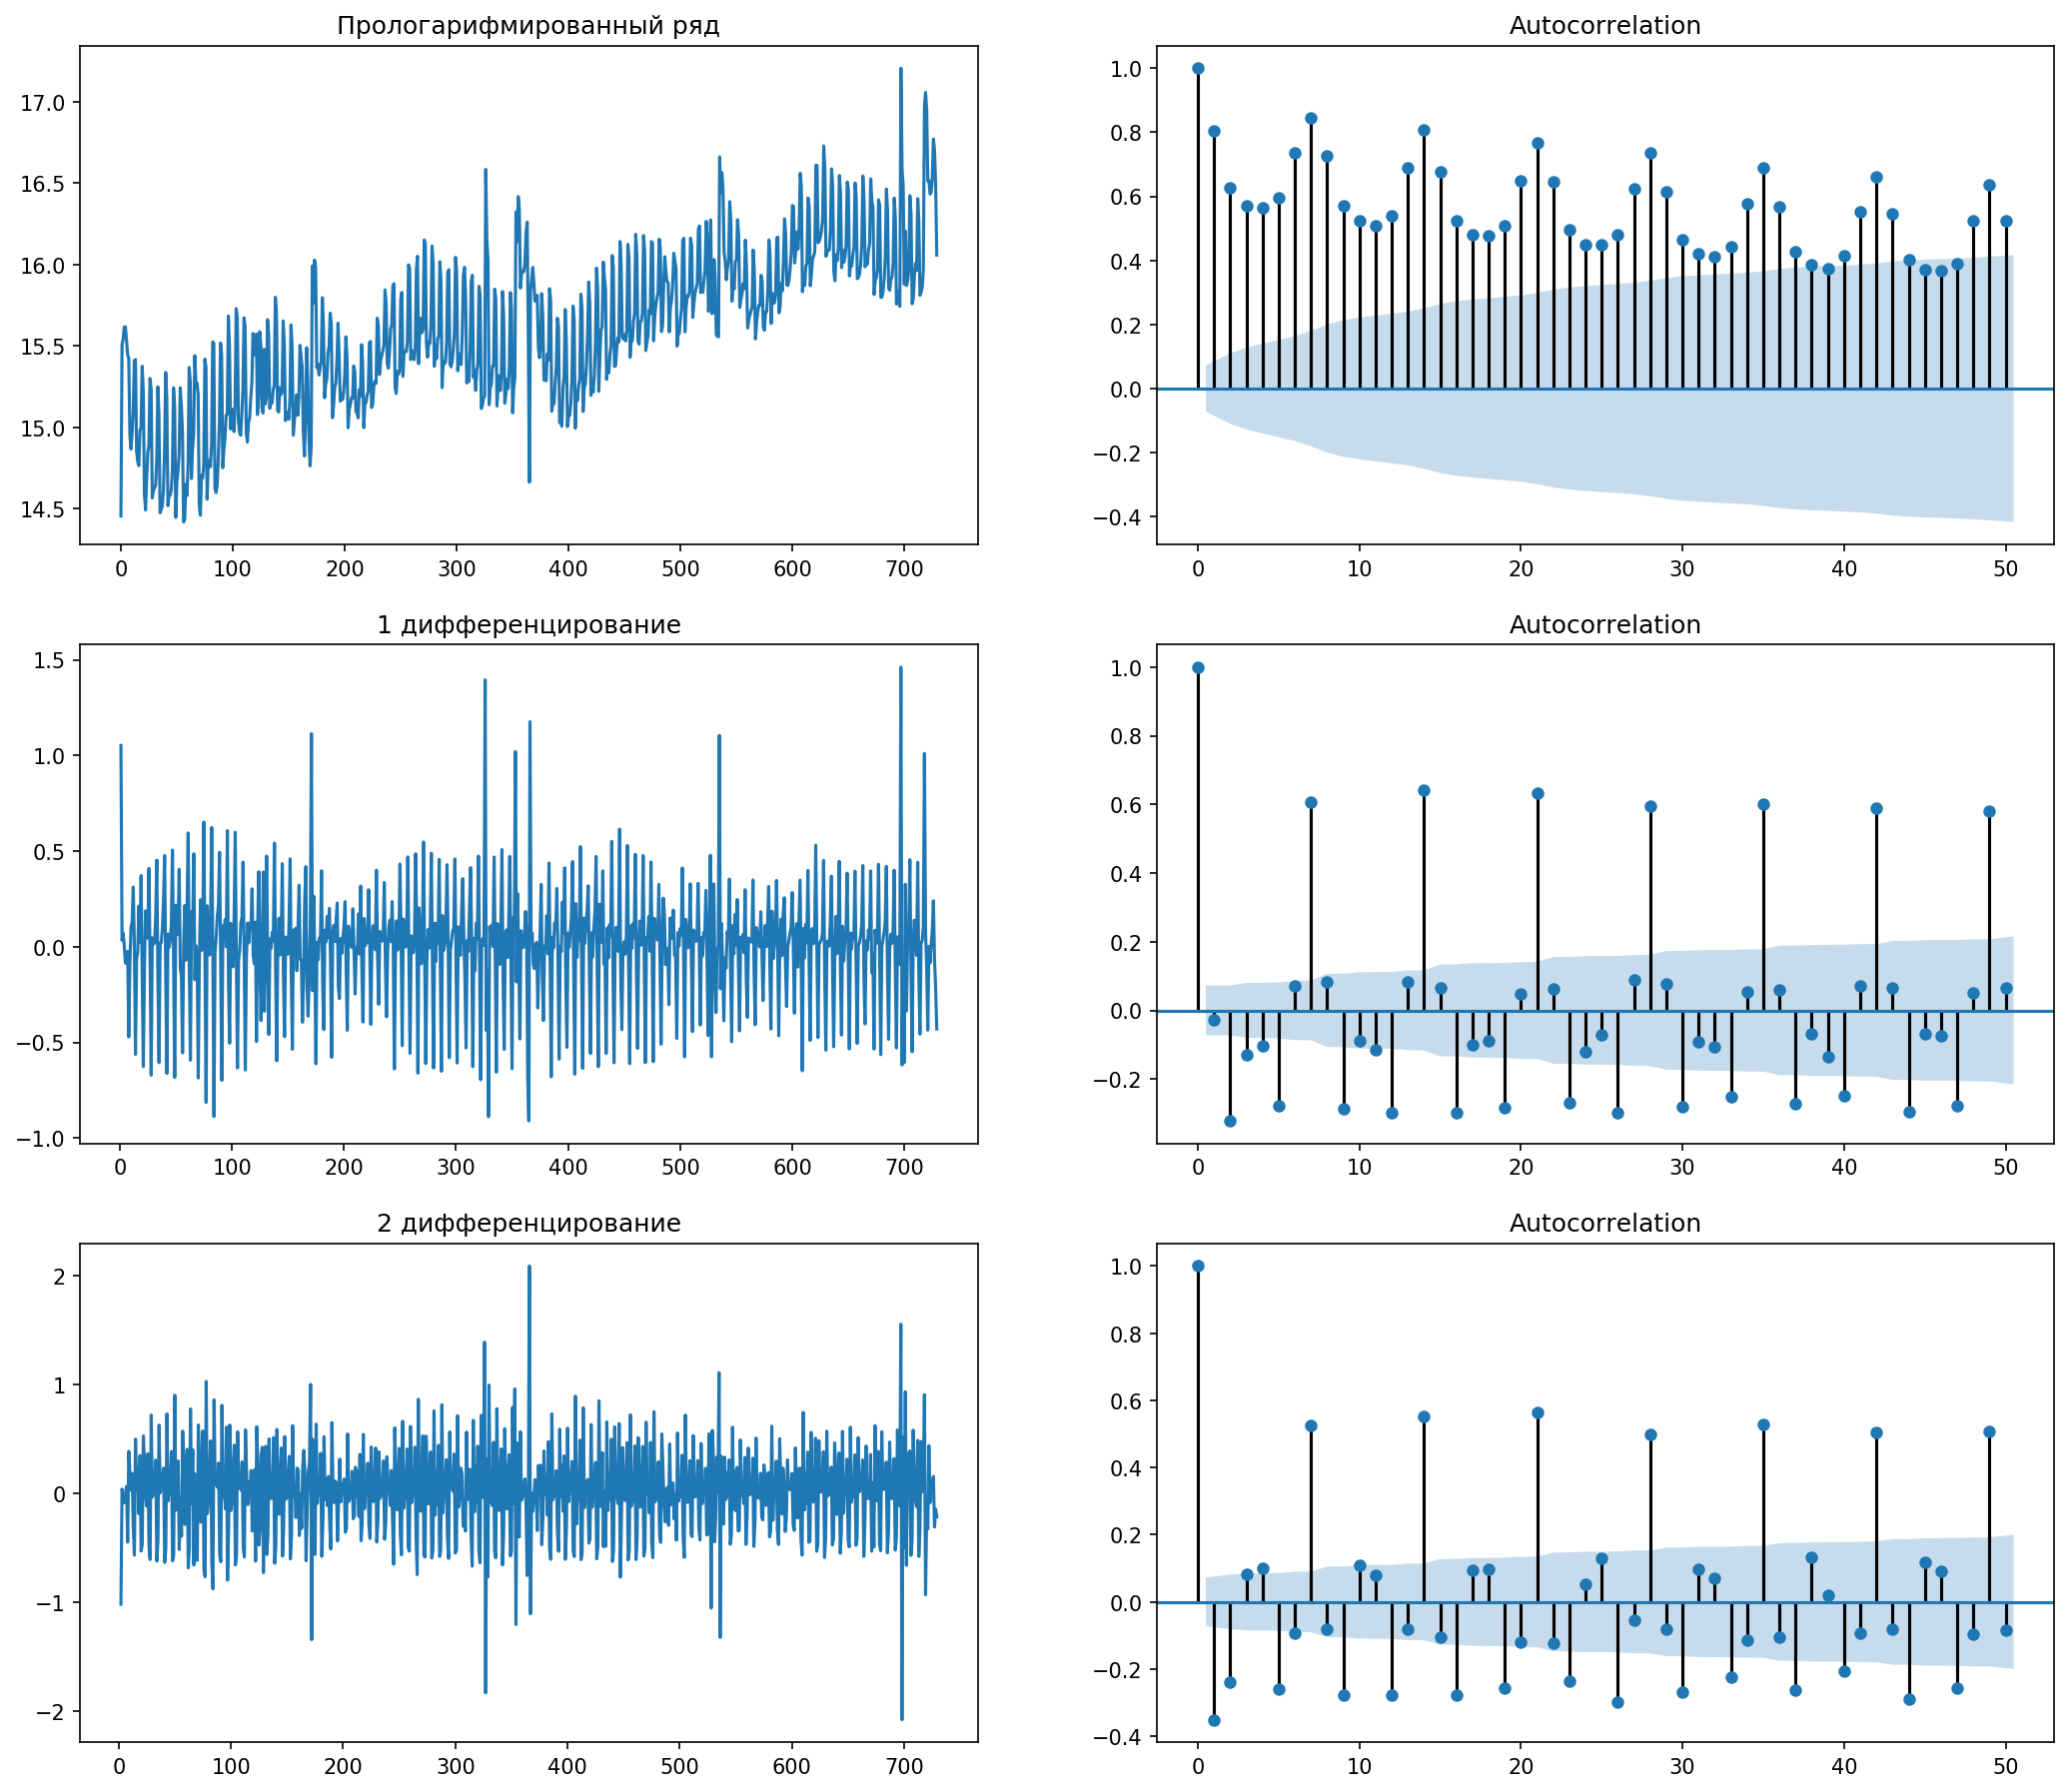

In [14]:
#Подберем необходимое кол-во дифференцирования ряда, чтобы привести его к стационарности
plt.rcParams.update({'figure.figsize':(17,15), 'figure.dpi':150})

x = np.log(pd.Series(df.values.squeeze()))

# Прологарифмированные данные
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(x); axes[0, 0].set_title('Прологарифмированный ряд')
sm.graphics.tsa.plot_acf(x, lags=50, ax=axes[0, 1])


# 1 дифференцирование
axes[1, 0].plot(x.diff()); axes[1, 0].set_title('1 дифференцирование')
sm.graphics.tsa.plot_acf(x.diff().dropna(), lags=50, ax=axes[1, 1])

# 2 дифференцирование
axes[2, 0].plot(x.diff().diff()); axes[2, 0].set_title('2 дифференцирование')
sm.graphics.tsa.plot_acf(x.diff().diff().dropna(), lags=50, ax=axes[2, 1])

plt.show()

Стационарность ряда достигается за 1 диффиренцирование

In [15]:
#Проверим продифференцированный ряд на стационарность
print(sm.tsa.stattools.kpss(x.diff().dropna(), regression='c')[0:2])

(0.06168876089216481, 0.1)


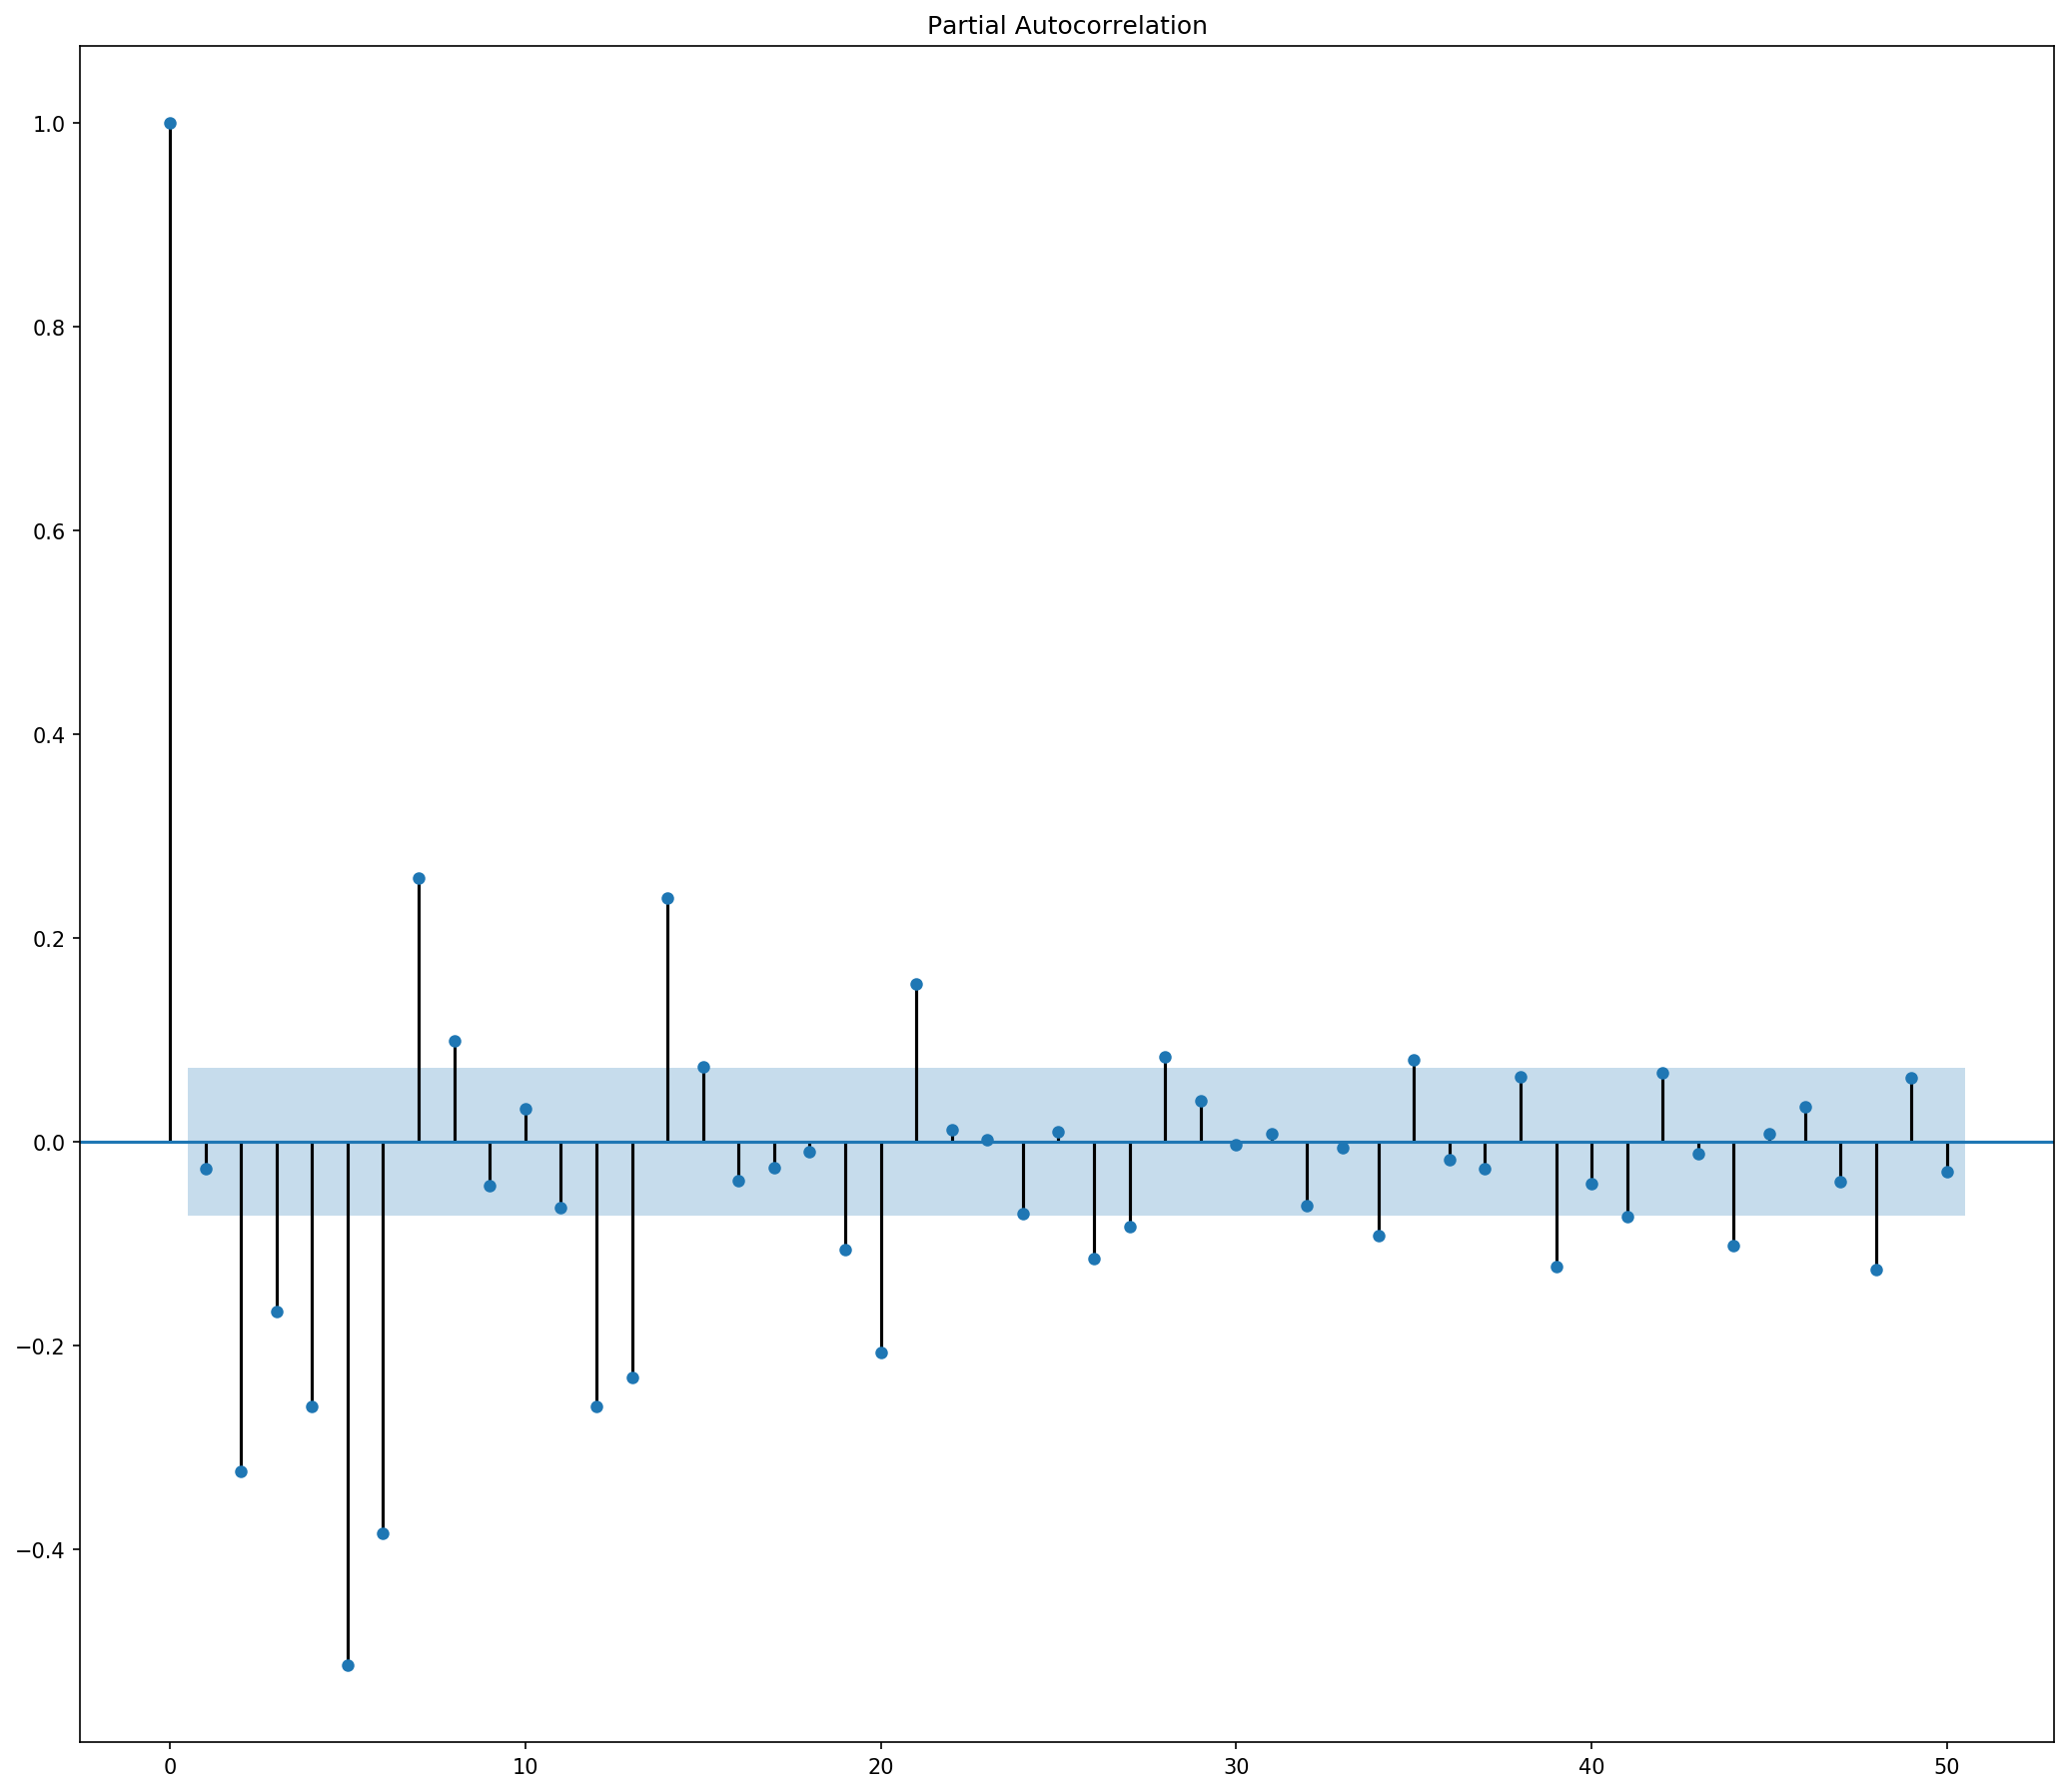

In [16]:
#Построим частичную автокорреляцию и подберем параметр p
sm.graphics.tsa.plot_pacf(x.diff().dropna(), lags=50);

Подберите наулучшую модель из класса ARIMA

In [17]:
#Строим модель ARIMA с подобранными параметрами
p = 7
q = 2
d = 1

src_data_model = df[:'2019-09-01']
src_data_model
model = sm.tsa.ARIMA(src_data_model, order=(p,d,q)).fit(full_output=True, disp=0)

Для обучения возьмите период [:'2019-09-01']. Выведете график полученных предсказаний с ['2019-09-01'] и реальных значение всего ряда

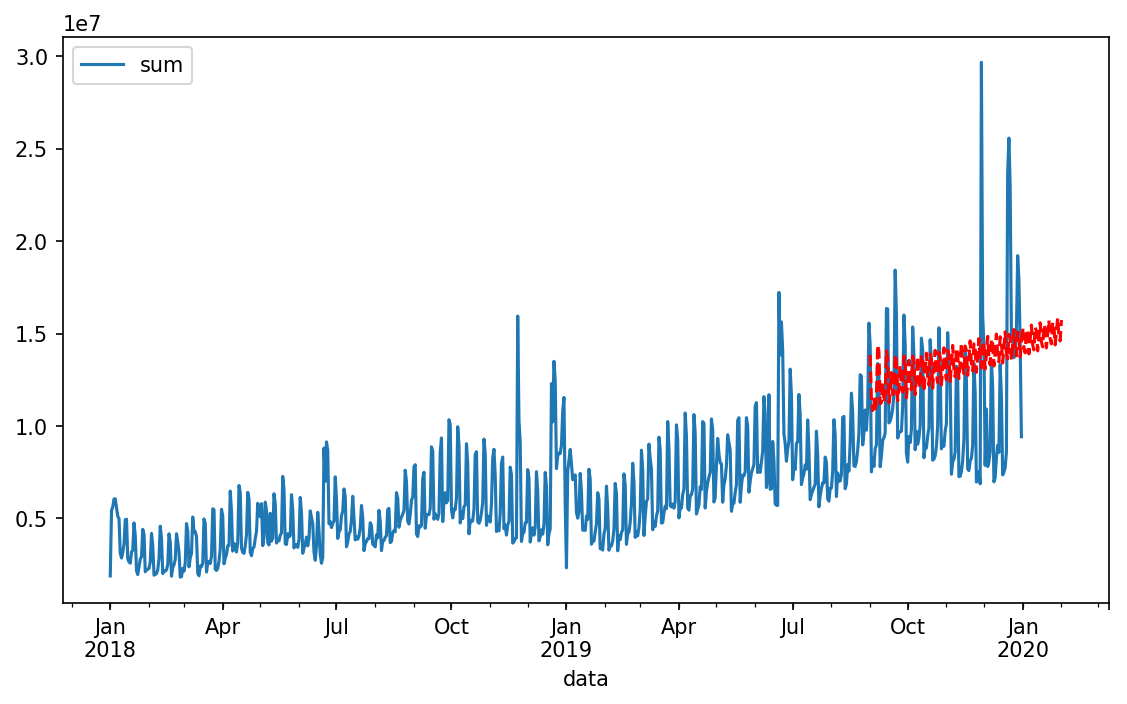

In [18]:
pred = model.predict('2019-09-01','2020-02-01', typ='levels')
df.plot(figsize=(9,5))
pred.plot(style='r--');

Посмотрите на получившиеся ошибки. Что вы думаете о них.

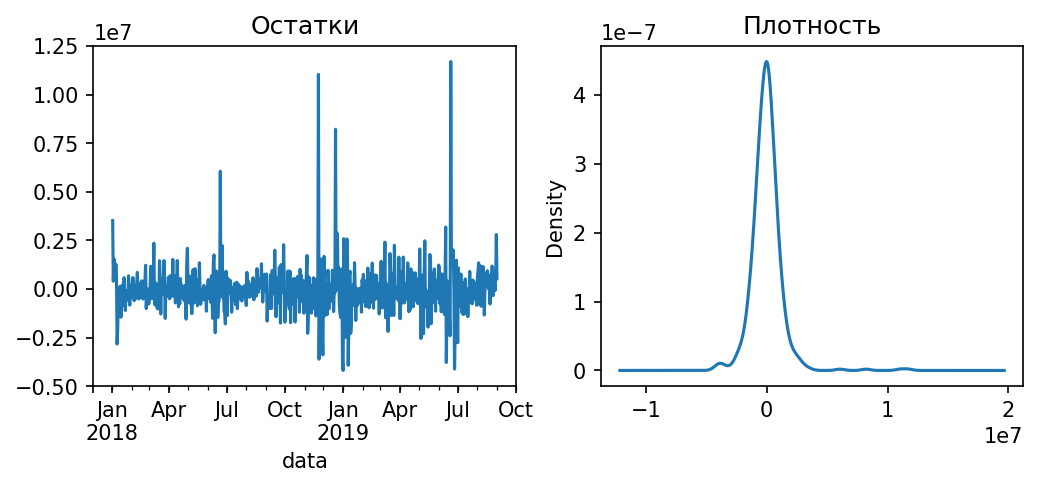

In [19]:
residuals = pd.DataFrame(model.resid)

fig, ax = plt.subplots(1,2,figsize = (8, 3))
residuals.plot(title='Остатки', legend=False, ax=ax[0])
residuals.plot(kind='kde', title='Плотность', legend=False, ax=ax[1])
plt.show()

Остаточные ошибки скачут около 0, распределение похоже на шум. Но из-за заметных пиков кажется, что модель можно улучшить и уменшить разброс ошибок.